# Google Play Store Apps
## by Abdelrhman Khairy Werby

## Investigation Overview
Users download apps for various usage purposes. Given that paid service is usually better at offering a pleasant experience and that free apps are more accessible to everyone, what the dataset will tell us about that and on another questions like: 
>1- Free or paid apps have a higher rating?  
 2- Which Apps Category mostly common on Google play store?  
 3- Which apps Category has the highest rating? (with rating count > 5000)  
 4- Which apps Category has the most number of installs?  
 5- Which app Category has the largest size?  

## Dataset Overview
>Google PlayStore App analytics. (1.1 Million + App Data).  
The data collected with the help of Python and Scrapy running on a google cloud vm instance, The data was collected on December 2020.

In [11]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [12]:
# load in the dataset into a pandas dataframe
df = pd.read_csv('Google-Playstore.csv')
# remove nan value and duplicates rows and clean data
df.Size = df.Size.replace('Varies with device',np.nan)
df.dropna(inplace=True)
df.drop_duplicates(inplace=True)
# remove space in colmuns name
df.columns = df.columns.str.replace(' ', '') 

In [13]:
# in size colmuns relplace 'K' with 1000
df.Size = df.Size.str.replace('k','e+3')
# in size colmuns relplace 'M' with 1000,000
df.Size = df.Size.str.replace('M','e+6')
# in size colmuns relplace 'G' with 1000,000,000
df.Size = df.Size.str.replace('G','e+9')
# in size colmuns remove the ','
df.Size = df.Size.str.replace(',', '') 
# convert the Size colmuns from string to float
df.Size = df.Size.astype(float)
# Divide the Size by 1024 to convert from Bytes to KB
df.Size = df.Size * 1e-6 

# remove '+' 
df.Installs = df.Installs.apply(lambda x: x.strip('+'))
# remove the ','
df.Installs = df.Installs.str.replace(',','')
# convert to float
df.Installs = df.Installs.astype(float)

In [14]:
# create new frame with (RatingCount > 5000) to use it we make exploration in rating.
# NOTE: all exploration on rating asuume the rating count > 5000.
df_ = df_ = df.query("RatingCount > 5000")

# function to plot the bar plot
def bar_plot(title, data, fig_size, rotation=0):
    ''' function to plot the bar plot '''
    # set the title of plot
    plt.title(title)
    # set the color of the plot
    base_color = sb.color_palette()[0]
    # set the size of the plot
    fig = plt.gcf()
    fig.set_size_inches(fig_size[0], fig_size[1])
    # plot data
    sb.countplot(data=df, x=data, color=base_color, order = df[data].value_counts().index);
    # set the rotation of x axis label
    plt.xticks(rotation=rotation);

# function to plot histgram for numarical data
def hist_plot(title, xlabel, ylabel, dataframe, data, step, rotation=0):
    ''' function to plot histgram for numarical data '''
    # set the title of plot
    plt.title(title)
    # set x axis label
    plt.xlabel(xlabel)
    # set y axis label
    plt.ylabel(ylabel)
    # set the x axis ticks based on the max value the data and set bins based on step
    plt.xticks(np.arange(0, dataframe[data].max()+1, step=step))
    bins = np.arange(0, dataframe[data].max()+1, step)
    # plot
    plt.hist(data = dataframe, x = data, bins = bins);
    # set the rotation of x axis label
    plt.xticks(rotation=rotation);

# function to plot 2D bar plot between two features
def bar_plot2d(title, dataframe, x_, y_, rotation=0):
    ''' function to plot 2D bar plot between two features '''
    # set the plot size
    plt.figure(figsize=(18, 10))
    # set the title of the plot
    plt.title(title)
    # sort the value to ploted on descending order
    res = dataframe.groupby(x_)[y_].mean().reset_index()
    finaldata = res.sort_values(y_, ascending=False)
    # plot
    sb.barplot(data=finaldata, x=x_, y=y_, order=np.array(finaldata[x_]), color=sb.color_palette()[0]);
    # set the rotation of x axis label
    plt.xticks(rotation=rotation);

> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## Free or paid apps have a higher rating?
The paid apps tend to have higher rating than free apps, because the paid apps mostly well designed apps in UI and UX so user give it high rating.  


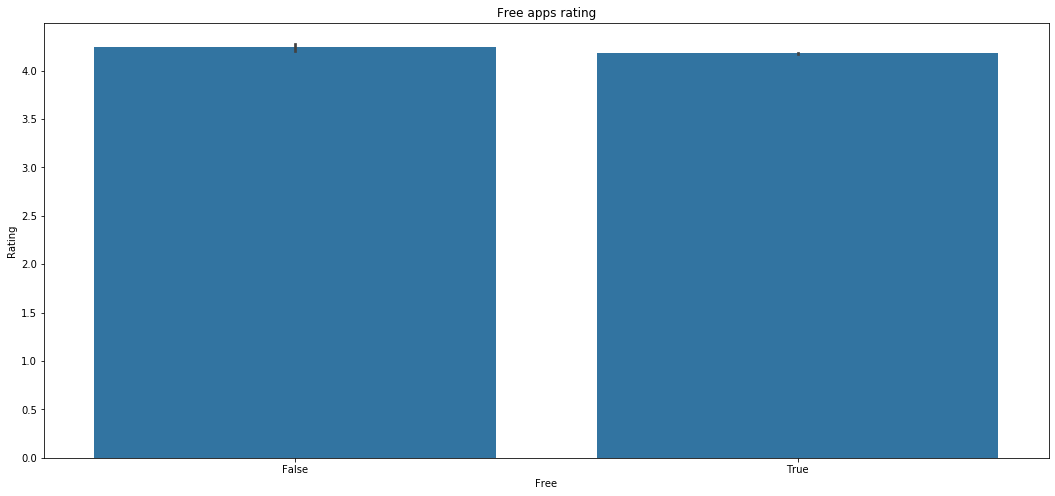

In [15]:
# set plot size
plt.figure(figsize=(18, 8))
# set plot title
plt.title('Free apps rating')
# plot
sb.barplot(data=df_, x='Free', y='Rating', color=sb.color_palette()[0]);

## Which Apps Category mostly common on Google play store?  
The Top 5 most common Category in Google play:  
>1- Education  
2- Music & Audio  
3- Entertainment  
4- Books & Reference  
5- Tools  

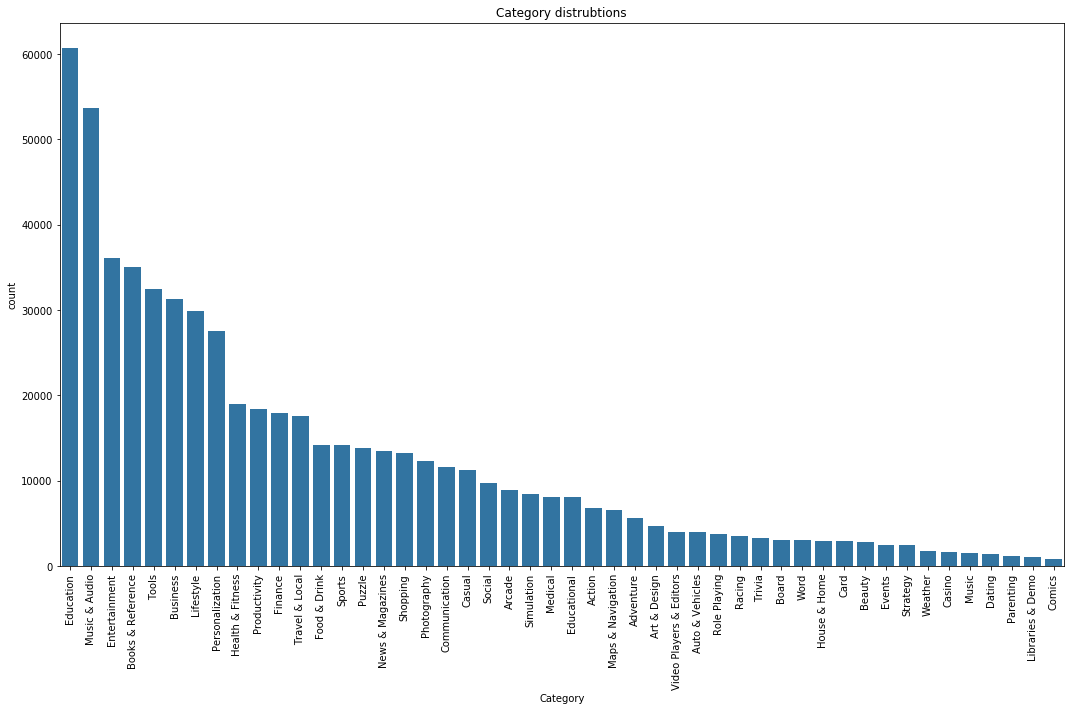

In [16]:
bar_plot('Category distrubtions', 'Category', (18, 10), rotation=90)

## Which apps Category has the highest rating? (with rating count > 5000)  
The bar plot shows the relationship between app category and the rating.  
NOTE: the plot may not be very accurate because the rating count varies from app to app (here I choose to plot only the apps with ratings above 5000 counts). 

The top 5 apps category in number of installs:  
>1- Books & Reference.  
2- Parenting.  
3- Health & Fitness.  
4- Word.  
5- Casino.  




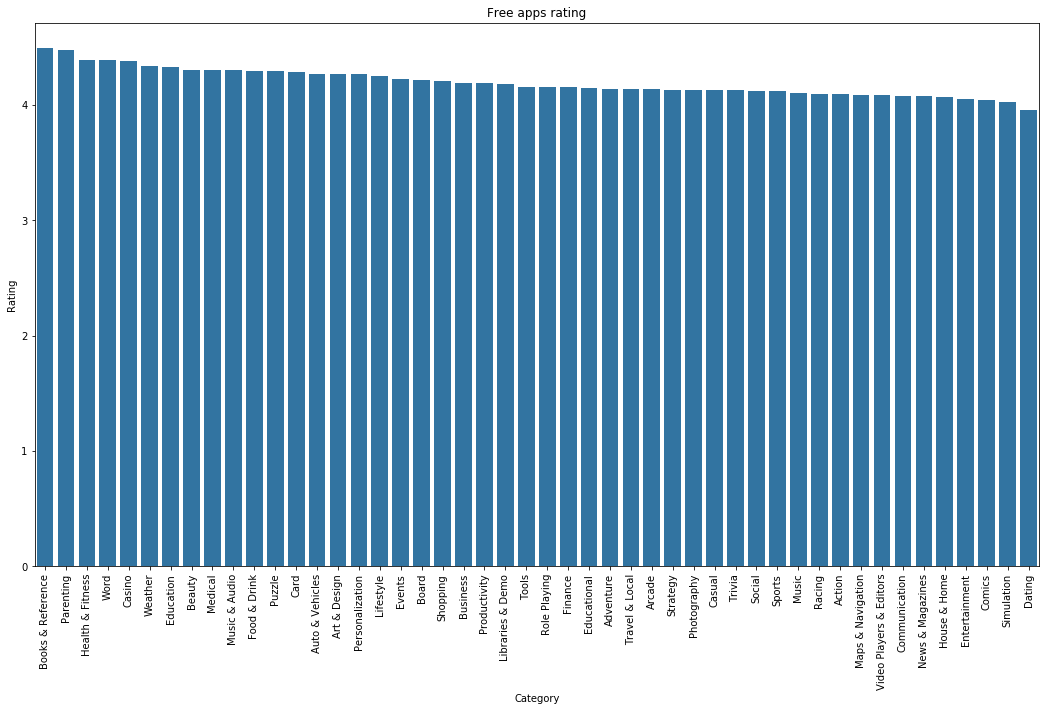

In [17]:
bar_plot2d('Free apps rating', df_, 'Category', 'Rating', rotation=90)

##  Which apps Category has the most number of installs?  
The bar plot shows the relationship between app category and the number of installs of the app.  
The top 5 apps category in number of installs:  
>  
1- Racing.  
2- Action.  
3- Strategy.  
4- Arcade.  
5- Video Players & Editors

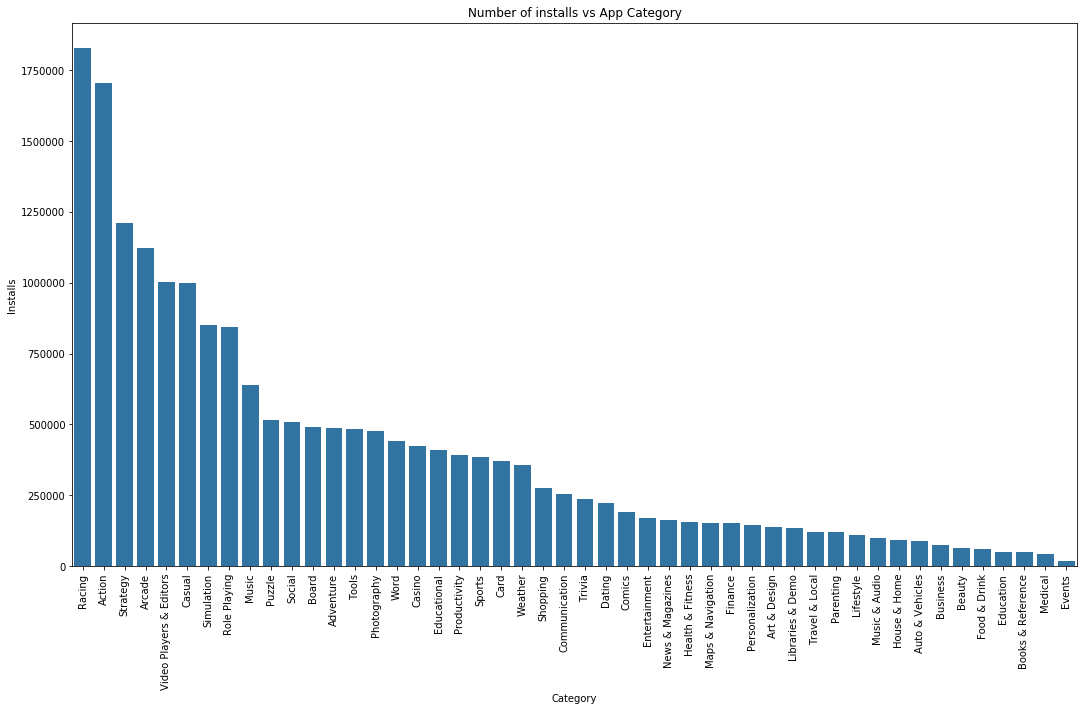

In [18]:
bar_plot2d('Number of installs vs App Category', df, 'Category', 'Installs', rotation=90)

## Which app Category has the largest size? 
The bar plot shows the relationship between the app category and the size of the app.   
The top 5 apps category in size:  
>  
1- Role Playing.  
2- Strategy.  
3- Simulation.  
4- Action.  
5- Racing.  

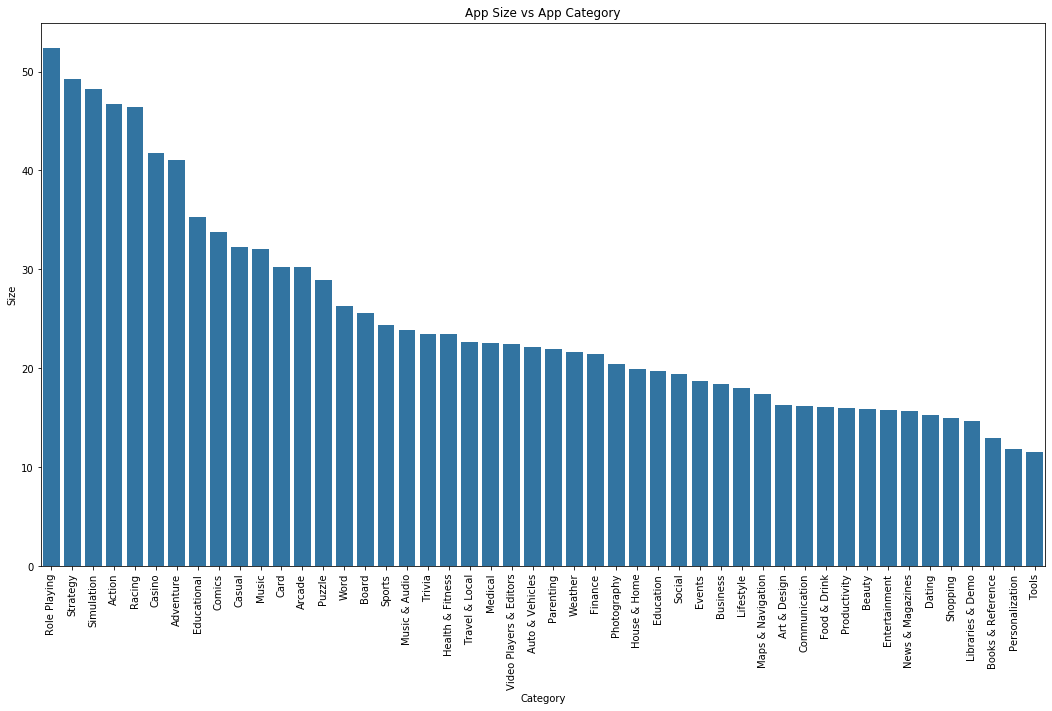

In [19]:
bar_plot2d('App Size vs App Category', df, 'Category', 'Size', rotation=90)

> Once you're ready to finish your presentation, check your output by using
nbconvert to export the notebook and set up a server for the slides. From the
terminal or command line, use the following expression:
> > `jupyter nbconvert <file_name>.ipynb --to slides --post serve --template output_toggle`

> This should open a tab in your web browser where you can scroll through your
presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent
slide. Make sure you remove all of the quote-formatted guide notes like this one
before you finish your presentation!

In [20]:
# jupyter nbconvert slide_deck_GooglePlay.ipynb --to slides --post serve --template output_toggle 